In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#Load dataset
store_file = pd.read_csv("C:/Users/Madhu/Desktop/Neu-Ulm/Semester2/ProjectPro/Rosmannsales/store.csv")
store_file.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [6]:
#Training data
store_train = pd.read_csv("C:/Users/Madhu/Desktop/Neu-Ulm/Semester2/ProjectPro/Rosmannsales/train.csv")

C:\Users\Madhu\AppData\Local\Temp\ipykernel_13368\1310053614.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  store_train = pd.read_csv("C:/Users/Madhu/Desktop/Neu-Ulm/Semester2/ProjectPro/Rosmannsales/train.csv")


In [7]:
store_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


## Merging the above two datasets on the column Store

It can be understood from the above 2 files that merging these gives more information on store details because, 
 
1. When observing store_file and store_train - the features present in both the files are different. 
2. store_train is giving more information about stores.
3. Hence merging store_file, store_train on the feature "Store" provides more information

In [8]:
merged_data = pd.merge( store_file,store_train, on='Store')
merged_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,2015-07-27,6102,612,1,1,0,1


In [9]:
merged_data.shape

(1017209, 18)

# EDA

The following steps are taken to understand and analyse the data
1. Fixing null values
2. Handling outliers
3. Exploring exceptional cases
4. Convert categorical features to numerical features

In [10]:
#identifying null/missing values in the dataset
print(merged_data.isnull().sum())
print("Size of the dataset:",len(merged_data))

Store                             0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
dtype: int64
Size of the dataset: 1017209


Let's examine the missing values in store_file(non merged dataset) and fix them. 
This would automatically fix missing values in merged file

In [11]:
print(store_file.isnull().sum())
print("Size of the dataset:",len(store_file))

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64
Size of the dataset: 1115


### Fixing missing values
The following approach is taken to fix the missing values
 
1. The missing values in CompetitionOpenSinceMonth and CompetitionOpenSinceYear can be filled in with mode values of month and year, as these features say the month and year the nearest competitior store was also open.

2. CompetitionDistance can be filled with mean value of the feature as it is a distance measure

3. Promo2SinceWeek, Promo2SinceYear and PromoInterval is having missing values where Promo2 feature is 0(store is not using promo codes). So, let's fill these 3 features also with 0.

In [12]:
#(1)
mode_cosm = store_file['CompetitionOpenSinceMonth'].mode()[0]
mode_cosy = store_file['CompetitionOpenSinceYear'].mode()[0]
store_file['CompetitionOpenSinceMonth'].fillna(mode_cosm,inplace=True)
store_file['CompetitionOpenSinceYear'].fillna(mode_cosy,inplace=True)

#(2)
mean_cd = store_file['CompetitionDistance'].mean()
store_file['CompetitionDistance'].fillna(mean_cd,inplace=True)

#(3)
store_file.update(store_file[['Promo2SinceWeek','Promo2SinceYear','PromoInterval']].fillna(0))

In [13]:
print(store_file.isnull().sum())

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64


### After fixing missing values, there are no missing values found 

In [14]:
#merge the datasets
merged_data = pd.merge( store_file,store_train, on='Store')
merged_data.shape

(1017209, 18)

## Handling the outliers

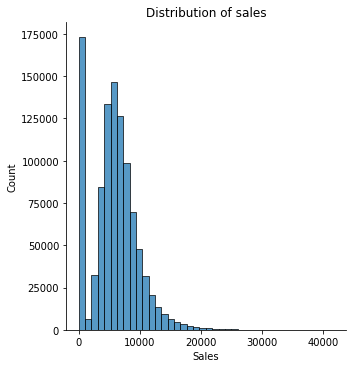

In [15]:
#Distribution of sales
sns.displot(merged_data,x='Sales',bins=40).set(title="Distribution of sales")

There are a lot of small sales as can be seen in the plot. We have to remove values which are very high and have a few occurances as this could be bulk sales which does not happen often
Let's use Z-Score to handle outliers here. If Z-Score is greater then 3 then it will be considered as an outlier and removed 

Mean of the Sales:  5773.818972305593
Standard Deviation of the Sales:  3849.9242828437527
Total outliers in data:  9731
Maximum Sales-Outlier:  41551
Minimum Sales-Outlier:  17325
shape (1017209, 18)


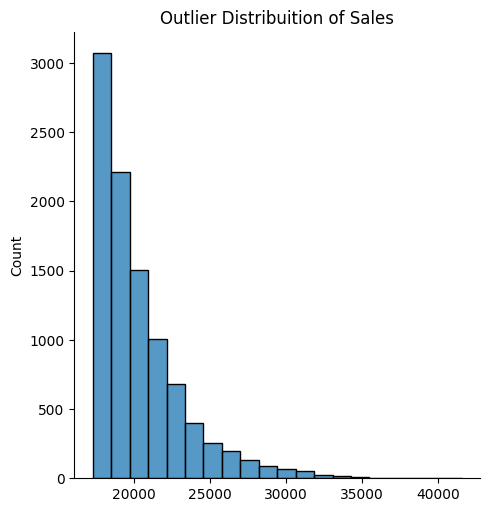

In [16]:
mean_sales = np.mean(merged_data['Sales']) 
stdev_sales = np.std(merged_data['Sales'])
print("Mean of the Sales: ",mean_sales)
print("Standard Deviation of the Sales: ",stdev_sales)

threshold = 3
outlier = [] 
for i in merged_data['Sales']: 
    z = (i-mean_sales)/stdev_sales
    if z > threshold: 
        outlier.append(i) 
print('Total outliers in data: ', len(outlier))
print("Maximum Sales-Outlier: ", max(outlier))
print("Minimum Sales-Outlier: ", min(outlier))
print("shape",merged_data.shape)

sns.displot(x=outlier,bins=20).set(title='Outlier Distribuition of Sales')

Removing the data where the sales are greater than 30k and also where there are no sales

In [17]:
# removing only outliers whose sales > 30k
zero_sales = merged_data.loc[merged_data['Sales'] == 0] 
sales_greater_than_30 = merged_data.loc[merged_data['Sales'] > 30000]

print("Length of actual dataset:", len(merged_data))
print("Length of data where sales is 0:", len(zero_sales),
      " which is", len(zero_sales)/len(merged_data)*100, "% of the whole data", )

print("Length of data where sales are greater than 30k:", len(sales_greater_than_30),
      "which is ", len(sales_greater_than_30)/len(merged_data)*100, "% of the whole data")

Length of actual dataset: 1017209
Length of data where sales is 0: 172871  which is 16.994639253093514 % of the whole data
Length of data where sales are greater than 30k: 153 which is  0.015041156733768577 % of the whole data


In [18]:
merged_data.drop(merged_data.loc[merged_data['Sales'] > 30000].index,inplace=True)
print(merged_data.shape)

(1017056, 18)


## Exploring exceptional cases
Here, let's try to see if there are any 0 sales, when shop is open and does not have any holiday on that particular day.

In [19]:
open_no_holiday_zero_sales = merged_data.loc[(merged_data['Sales'] == 0) & (merged_data['Open'] == 1) & 
                                          (merged_data['StateHoliday'] == 0) & (merged_data['SchoolHoliday'] == 0)]

print("Number of records where sales were zero even when stores were open and there were no state/school holidays: ",len(open_no_holiday_zero_sales))
open_no_holiday_zero_sales.head()

Number of records where sales were zero even when stores were open and there were no state/school holidays:  12


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
22589,25,c,a,430.0,4.0,2003.0,0,0.0,0.0,0,4,2014-02-13,0,0,1,0,0,0
22590,25,c,a,430.0,4.0,2003.0,0,0.0,0.0,0,3,2014-02-12,0,0,1,0,0,0
25212,28,a,a,1200.0,10.0,2014.0,1,6.0,2015.0,"Mar,Jun,Sept,Dec",4,2014-09-04,0,0,1,1,0,0
205303,227,a,a,2370.0,9.0,2013.0,0,0.0,0.0,0,4,2014-09-11,0,0,1,0,0,0
297110,327,c,c,1390.0,12.0,2004.0,0,0.0,0.0,0,3,2014-03-12,0,0,1,0,0,0


There are records with 0 sales even though the store is open and having no school/state holidays. This is a very exceptional case and there is no additional information provided to further examine this. Sometimes, records like this might also be human errors. As the total number of these records here are only 12, let's remove these records 

In [20]:
merged_data.drop(merged_data.loc[(merged_data['Sales'] == 0) & (merged_data['Open'] == 1) & 
                                     (merged_data['StateHoliday'] == 0) & 
                                     (merged_data['SchoolHoliday'] == 0)].index,inplace=True)
merged_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,1,2015-07-27,6102,612,1,1,0,1


In [21]:
#unique values in the dataset
columns = list(merged_data.columns)
columns.remove('Date')
columns.remove('CompetitionDistance')
for c in columns:
    print(c,"----",merged_data[c].unique())

Store ---- [   1    2    3 ... 1113 1114 1115]
StoreType ---- ['c' 'a' 'd' 'b']
Assortment ---- ['a' 'c' 'b']
CompetitionOpenSinceMonth ---- [ 9. 11. 12.  4. 10.  8.  3.  6.  5.  1.  2.  7.]
CompetitionOpenSinceYear ---- [2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011. 2010. 2005. 1999.
 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]
Promo2 ---- [0 1]
Promo2SinceWeek ---- [ 0. 13. 14.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35.
 23. 48. 36. 50. 44. 49. 28.]
Promo2SinceYear ---- [   0. 2010. 2011. 2012. 2009. 2014. 2015. 2013.]
PromoInterval ---- [0 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']
DayOfWeek ---- [5 4 3 2 1 7 6]
Sales ---- [ 5263  5020  4782 ... 20362 18841 21237]
Customers ---- [ 555  546  523 ... 4042 4106 3589]
Open ---- [1 0]
Promo ---- [1 0]
StateHoliday ---- ['0' 'a' 'b' 'c' 0]
SchoolHoliday ---- [1 0]


In [22]:
#extracting year and months from date
merged_data['Year']=merged_data['Date'].apply(lambda x:int(str(x)[:4]))#extracting first four characters to get year
merged_data['Month']=merged_data['Date'].apply(lambda x:int(str(x)[5:7]))#similar way as above line

[Text(0.5, 1.0, 'Sales by Year')]

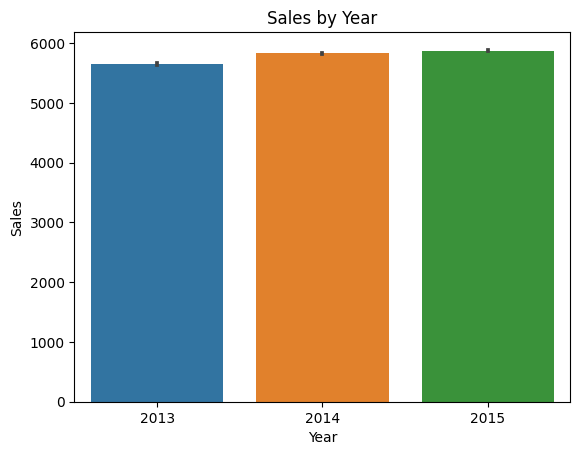

In [23]:
#Yearly sales
sns.barplot(x='Year',y='Sales',data = merged_data).set(title='Sales by Year')


 It can be noticed that there is an increase in sale for every year

[Text(0.5, 1.0, 'Sales by Days of Week')]

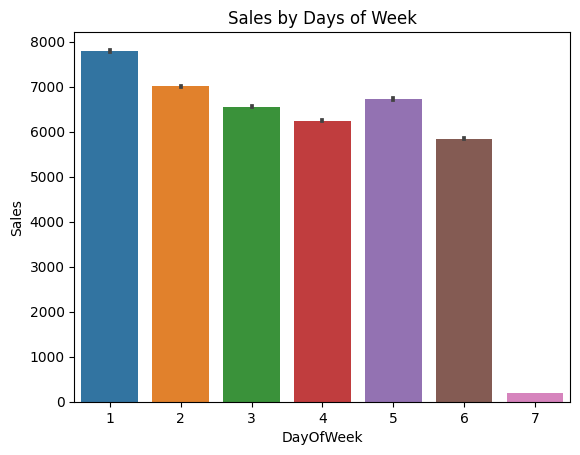

In [24]:
#Sales by  days of week
sns.barplot(x='DayOfWeek',y='Sales',data = merged_data).set(title='Sales by Days of Week')

1 corresponds to Monday and 7 corresponds to Sunday. From the above plot, it can be understood that the sales are highest on Monday and less on Sunday because of the fact that most of the stores have holiday on Sunday

[Text(0.5, 1.0, 'Sales by Days of Week')]

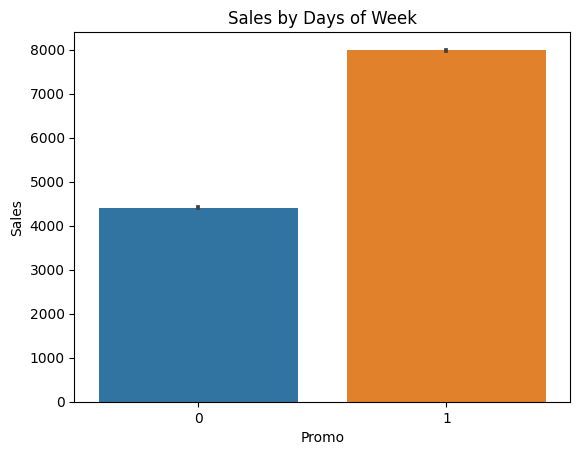

In [25]:
#Sales by Promo
sns.barplot(x='Promo',y='Sales',data = merged_data).set(title='Sales by Days of Week')

#### 0 - Stores without promo codes offers
#### 1 - Stores with promo codes offers
Sales are high in stores where there are promo codes available

In [26]:
#Sales wrt state holidays

#Since StateHoliday column has values 0 and '0', we have to change values with 0 to '0' as other values are also in the similar way
merged_data["StateHoliday"].loc[merged_data["StateHoliday"]==0]="0"
merged_data["StateHoliday"].unique()

C:\Users\Madhu\AppData\Local\Temp\ipykernel_13368\2878781869.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data["StateHoliday"].loc[merged_data["StateHoliday"]==0]="0"


array(['0', 'a', 'b', 'c'], dtype=object)

[Text(0.5, 1.0, 'Sales by StateHoliday')]

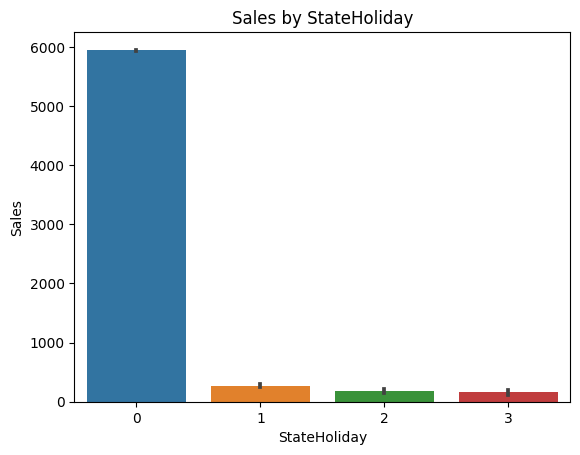

In [42]:
#Now, let's have a look at sales wrt to state holidays
sns.barplot(x='StateHoliday',y='Sales',data = merged_data).set(title='Sales by StateHoliday')

#### a - Public holiday
#### b - Easter holiday
#### c - Christmas
#### 0 - No holiday, working day 
As many stores are closed during state holidays, sales are observed to be less when there are state holidays

[Text(0.5, 1.0, 'Sales by SchoolHoliday')]

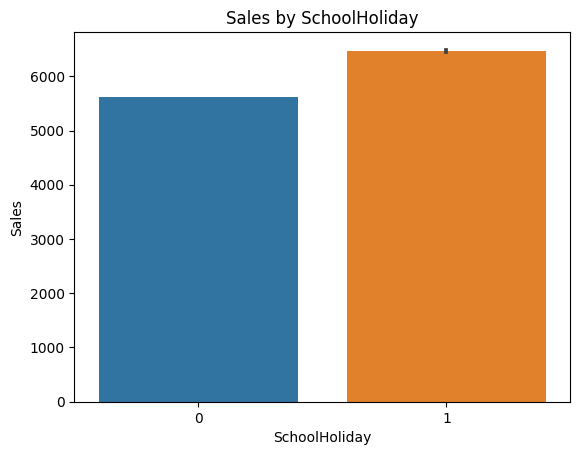

In [43]:
#Sales wrt school holiday
sns.barplot(x='SchoolHoliday',y='Sales',data = merged_data).set(title='Sales by SchoolHoliday')

#### 0 - No school holiday
#### 1 - school holiday
Sales are more during school holidays

[Text(0.5, 1.0, 'Sales by type of store')]

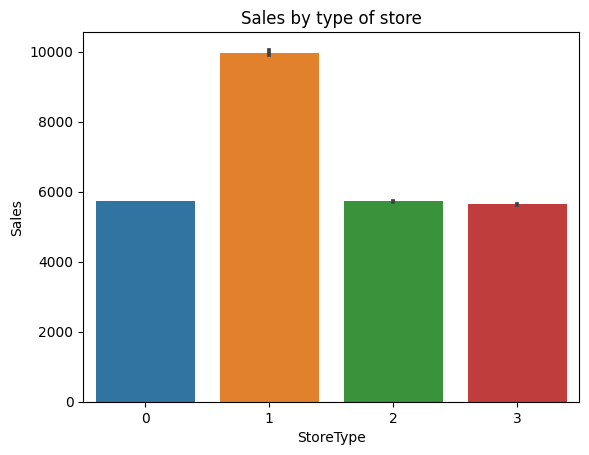

In [44]:
#Sales by store type
sns.barplot(x='StoreType',y='Sales',data = merged_data).set(title='Sales by type of store')

Sales fo store type b are very high when compared to store type a,c,d which have almost similar sales

[Text(0.5, 1.0, 'Sales by Assortment type')]

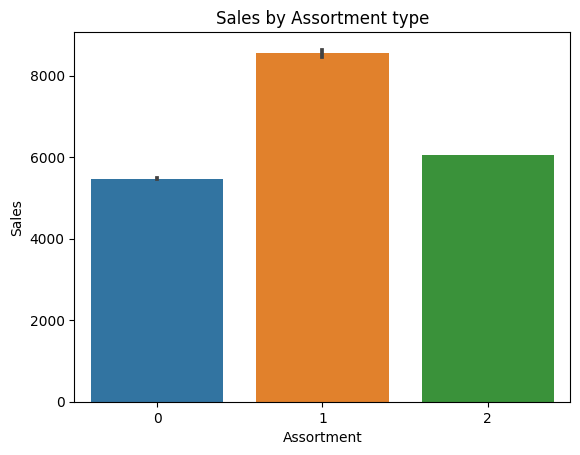

In [45]:
#Sales by assortment levels
sns.barplot(x='Assortment',y='Sales',data = merged_data).set(title='Sales by Assortment type')




#### a - basic
#### b - extra
#### c- extended
sales for b assortment type are very high when compared to a . Sales of assortment type c are medium

<AxesSubplot:title={'center':'Sales vs Competition distance'}, xlabel='CompetitionDistance', ylabel='Sales'>

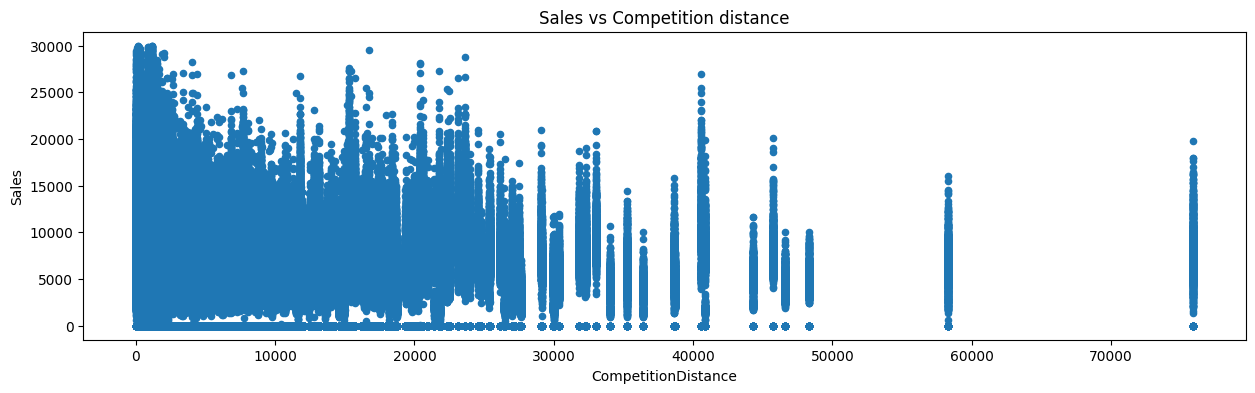

In [46]:
merged_data.plot(kind='scatter',x='CompetitionDistance',y='Sales',figsize=(15,4),title='Sales vs Competition distance')

Sales are more where the competitior stores are close by and are comparitively less where the competitior stores are far away 

## Convert categorical features to numerical features

In [47]:
merged_data.drop(['Date'],axis=1,inplace=True)
merged_data.head()

KeyError: "['Date'] not found in axis"

In [ ]:
#encoding all categorical variables to numeric values
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()

merged_data['StoreType']= label_encoder.fit_transform(merged_data['StoreType'])
merged_data['Assortment']= label_encoder.fit_transform(merged_data['Assortment']) 

# for promo interval
merged_data["PromoInterval"].loc[merged_data["PromoInterval"] == "Jan,Apr,Jul,Oct"] = 1
merged_data["PromoInterval"].loc[merged_data["PromoInterval"] == "Feb,May,Aug,Nov"] = 2
merged_data["PromoInterval"].loc[merged_data["PromoInterval"] == "Mar,Jun,Sept,Dec"] = 3

# for State Holiday
merged_data["StateHoliday"].loc[merged_data["StateHoliday"] == "a"] = 1
merged_data["StateHoliday"].loc[merged_data["StateHoliday"] == "b"] = 2
merged_data["StateHoliday"].loc[merged_data["StateHoliday"] == "c"] = 3

In [ ]:
merged_data.head()

In [ ]:
merged_data['StateHoliday'] = pd.to_numeric(merged_data['StateHoliday'])
merged_data['PromoInterval'] = pd.to_numeric(merged_data['PromoInterval'])

<AxesSubplot:>

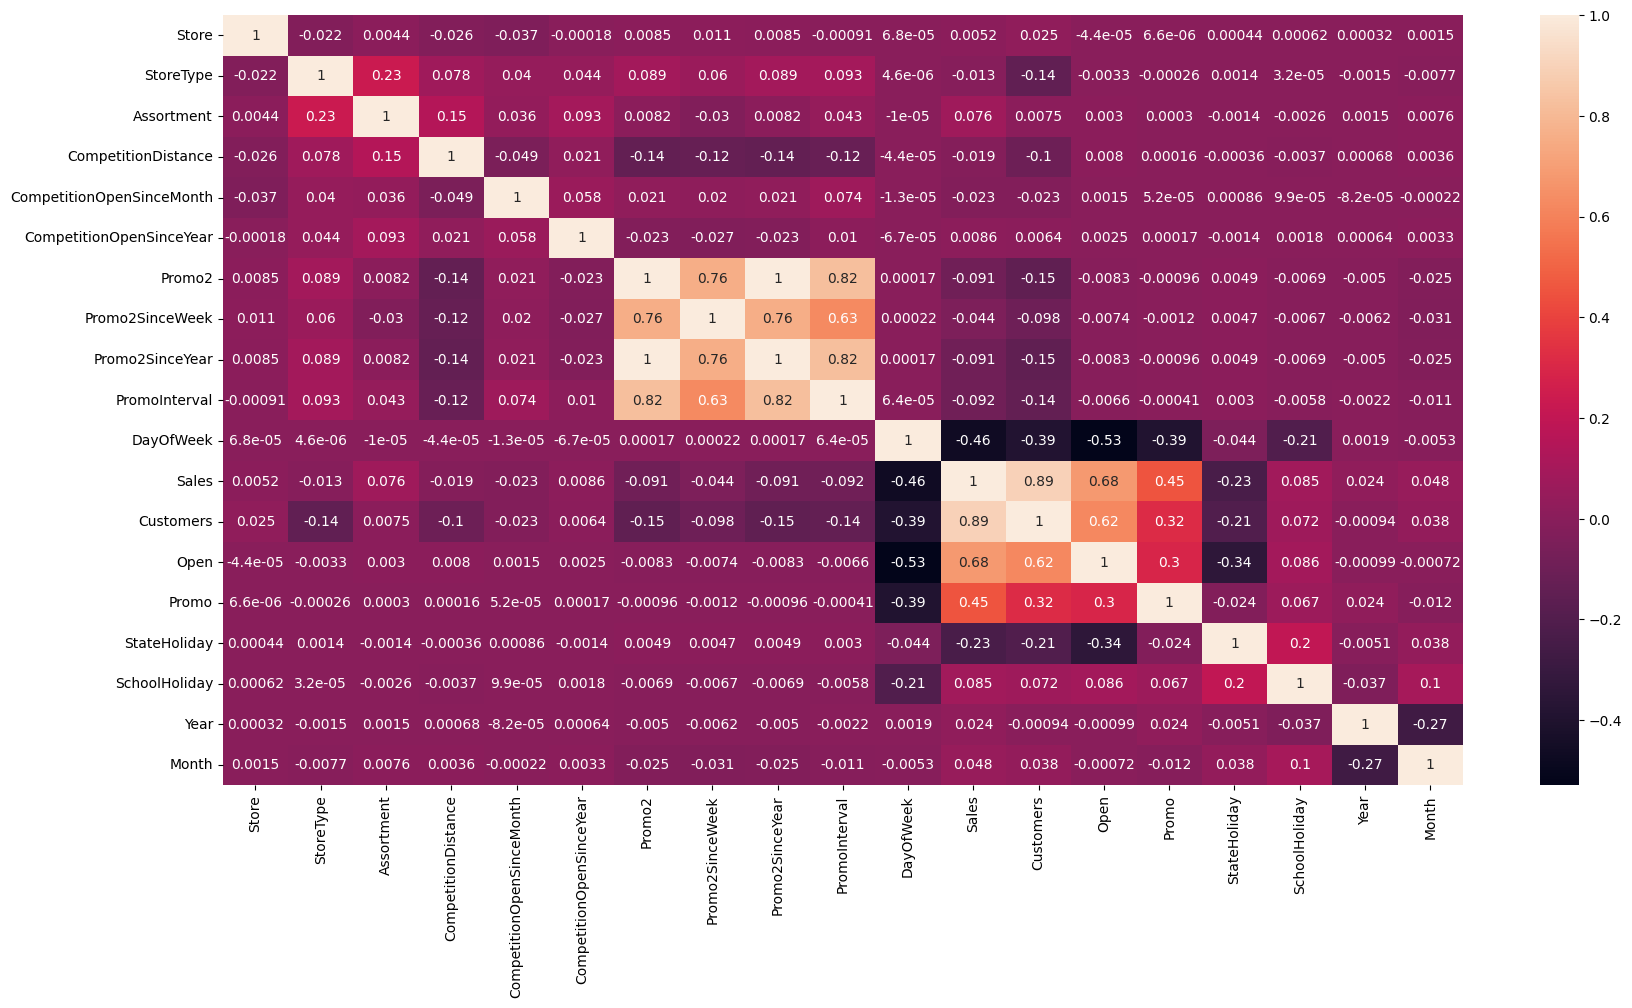

In [48]:
plt.figure(figsize=(20,10))
sns.heatmap(merged_data.corr(),annot = True)

#### Sales is highly correlated with Open, Customers and Promo Code
#### Promocode is highly correlated with Promo2SinceWeek, Promo2SinceYear, PromoInterval

# Implementing models on the data

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import math

Let's have a look at the number of records where the store is closed 

In [50]:
merged_data[merged_data['Open']==0]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
5,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,7,0,0,0,0,0,0,2015,7
12,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,7,0,0,0,0,0,0,2015,7
19,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,7,0,0,0,0,0,0,2015,7
26,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,7,0,0,0,0,0,0,2015,7
33,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,7,0,0,0,0,0,0,2015,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017182,1115,3,2,5350.0,9.0,2013.0,1,22.0,2012.0,3,7,0,0,0,0,0,0,2013,1
1017189,1115,3,2,5350.0,9.0,2013.0,1,22.0,2012.0,3,7,0,0,0,0,0,0,2013,1
1017196,1115,3,2,5350.0,9.0,2013.0,1,22.0,2012.0,3,7,0,0,0,0,0,0,2013,1
1017203,1115,3,2,5350.0,9.0,2013.0,1,22.0,2012.0,3,7,0,0,0,0,0,1,2013,1


In [51]:
merged_data_subset = merged_data[merged_data['Open'] == 1]
merged_data_subset_closed = merged_data[merged_data['Open'] == 0]
x_train, x_test, y_train, y_test_open = train_test_split(merged_data_subset.drop(['Sales','Customers', 'Open'],axis=1),
                                                    merged_data_subset['Sales'],test_size=0.20)

In [52]:
epsilon = 1e-10
x_train.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'DayOfWeek',
       'Promo', 'StateHoliday', 'SchoolHoliday', 'Year', 'Month'],
      dtype='object')

## Linear Regression

In [53]:
from sklearn import linear_model

regression_model = linear_model.LinearRegression() # making regression model
regression_model.fit(x_train, y_train) 

prediction_open = regression_model.predict(x_test)

prediction_closed = np.zeros(merged_data_subset_closed.shape[0])

prediction = np.append(prediction_open, prediction_closed)

y_test = np.append(y_test_open, np.zeros(merged_data_subset_closed.shape[0]))

print("r2_score: ",r2_score(y_test,prediction))
print("Mean absolute error: %.2f" % mean_absolute_error(y_test,prediction))
print("Root mean squared error: ", math.sqrt(mean_squared_error(y_test,prediction)))

r2_score:  0.7730808939370395
Mean absolute error: 1000.38
Root mean squared error:  1952.5938658826442


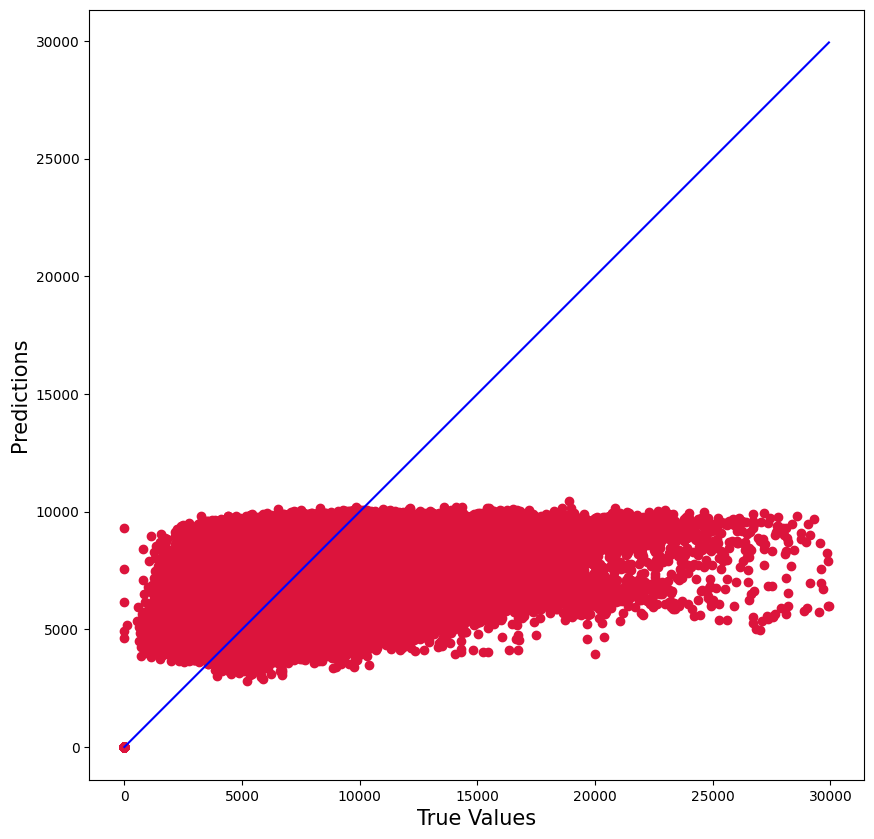

In [54]:
plt.figure(figsize=(10,10))
plt.scatter(y_test,prediction, c='crimson')

p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

 A plot is shown for True Values and Predictions
There is some bias in the model, as it can be seen that the model is not able to predict values above 10000 
 Ideally, the data points seen in the plot here should be around the regression line. But, that is not the case here

# SGD Regressor

It is a simple and efficient algorithm which is used to find the coefficients/parameters of function that minimizes a cost function

C:\Users\Madhu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


r2_score:  -6.13326891129346e+24
Mean absolute error: 4283359281892369.00
Root mean squared error:  1.015131704730757e+16


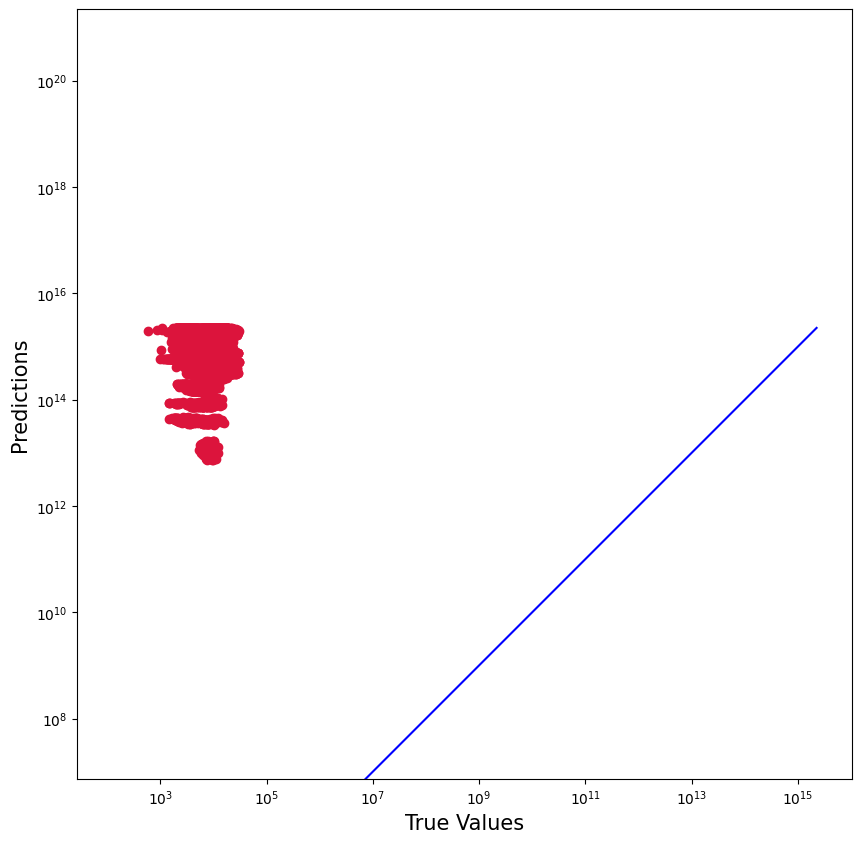

In [55]:

from sklearn.linear_model import SGDRegressor
sgd_regressor_model = SGDRegressor(max_iter=2)  # if iterations are increased then it leads to overfitting
sgd_regressor_model.fit(x_train,y_train)

prediction_open = sgd_regressor_model.predict(x_test)
prediction_closed = np.zeros(merged_data_subset_closed.shape[0])

prediction = np.append(prediction_open, prediction_closed)

y_test = np.append(y_test_open, np.zeros(merged_data_subset_closed.shape[0]))

print("r2_score: ",r2_score(y_test,prediction))
print("Mean absolute error: %.2f" % mean_absolute_error(y_test,prediction))
print("Root mean squared error: ", math.sqrt(mean_squared_error(y_test,prediction)))

plt.figure(figsize=(10,10))
plt.scatter(y_test,prediction, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

 A negative R2 score denotes that the model is bad. There are no predictions visible at all in the plot.
Even though the iterations are changed, this is not giving a good model performance

# Random Forest Regressor

r2_score:  0.9657949668009737
Mean absolute error: 356.44
Root mean squared error:  758.0910977644936


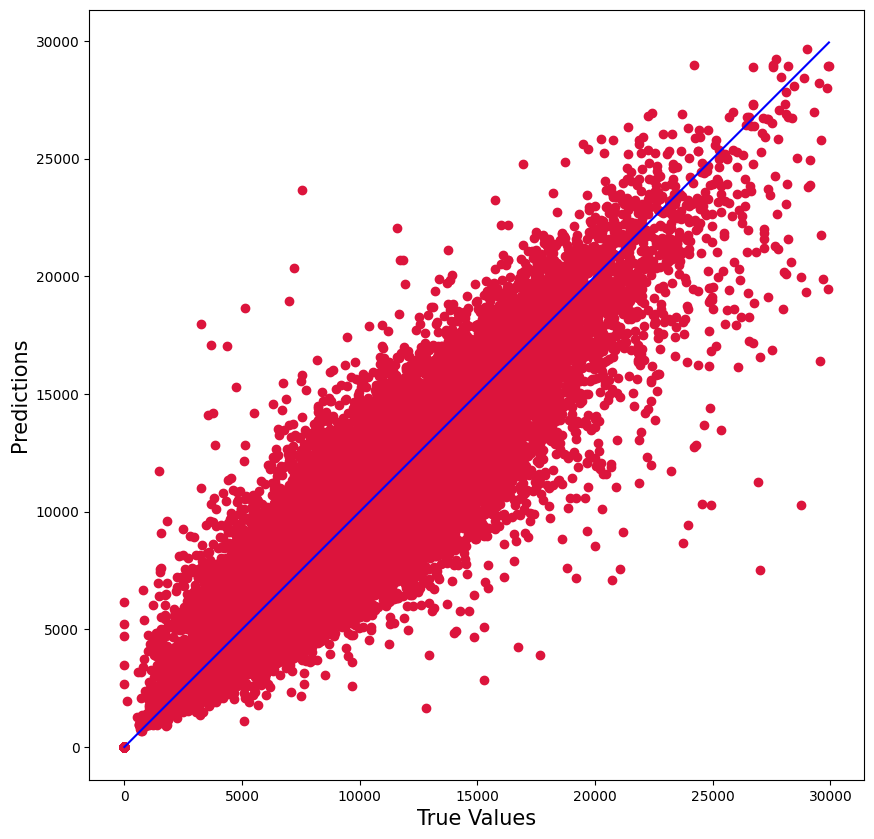

In [56]:
from sklearn.ensemble import RandomForestRegressor

random_forest_regressor_model = RandomForestRegressor()
random_forest_regressor_model.fit(x_train,y_train)

prediction_open = random_forest_regressor_model.predict(x_test)
prediction_closed = np.zeros(merged_data_subset_closed.shape[0])

prediction = np.append(prediction_open, prediction_closed)

y_test = np.append(y_test_open, np.zeros(merged_data_subset_closed.shape[0]))

print("r2_score: ",r2_score(y_test,prediction))
print("Mean absolute error: %.2f" % mean_absolute_error(y_test,prediction))
print("Root mean squared error: ", math.sqrt(mean_squared_error(y_test,prediction)))


plt.figure(figsize=(10,10))
plt.scatter(y_test,prediction, c='crimson')

p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

R2 is  almost equal to 1. Mean absolute error, RMSE are also good. If the graph is observed, the data points seems to be dense around the regression line and are scattered away from the line. This is a good sign.
Also, there is no bias as seen from the graph. The data points does not seem to be concentrated only on one side of the line or for a low true value, a very high predicted value is not seen. Overall, this model seems to be good


In [58]:
feature_importance = random_forest_regressor_model.feature_importances_
feature_importance

array([0.17808949, 0.03496998, 0.02927535, 0.20957834, 0.0693162 ,
       0.07628581, 0.00356782, 0.0299558 , 0.03394922, 0.01273112,
       0.08134733, 0.14049178, 0.00120588, 0.01260165, 0.02378944,
       0.06284479])

In [59]:
# features used
columns = list(x_train.columns)
columns

['Store',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval',
 'DayOfWeek',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'Year',
 'Month']

In [60]:
feature_importance_value = []
for i in range(len(feature_importance)):
    feature_importance_value.append(round(feature_importance[i],5))
feature_importance_value

[0.17809,
 0.03497,
 0.02928,
 0.20958,
 0.06932,
 0.07629,
 0.00357,
 0.02996,
 0.03395,
 0.01273,
 0.08135,
 0.14049,
 0.00121,
 0.0126,
 0.02379,
 0.06284]

In [61]:
feature_importance_df = pd.DataFrame({"Features":columns,
                                     "Values":feature_importance_value })
feature_importance_df

,Features,Values
0,Store,0.17809
1,StoreType,0.03497
2,Assortment,0.02928
3,CompetitionDistance,0.20958
4,CompetitionOpenSinceMonth,0.06932
5,CompetitionOpenSinceYear,0.07629
6,Promo2,0.00357
7,Promo2SinceWeek,0.02996
8,Promo2SinceYear,0.03395
9,PromoInterval,0.01273


In [62]:
feature_importance_df.sort_values(by=["Values"], inplace=True, ascending=False)
feature_importance_df

,Features,Values
3,CompetitionDistance,0.20958
0,Store,0.17809
11,Promo,0.14049
10,DayOfWeek,0.08135
5,CompetitionOpenSinceYear,0.07629
4,CompetitionOpenSinceMonth,0.06932
15,Month,0.06284
1,StoreType,0.03497
8,Promo2SinceYear,0.03395
7,Promo2SinceWeek,0.02996


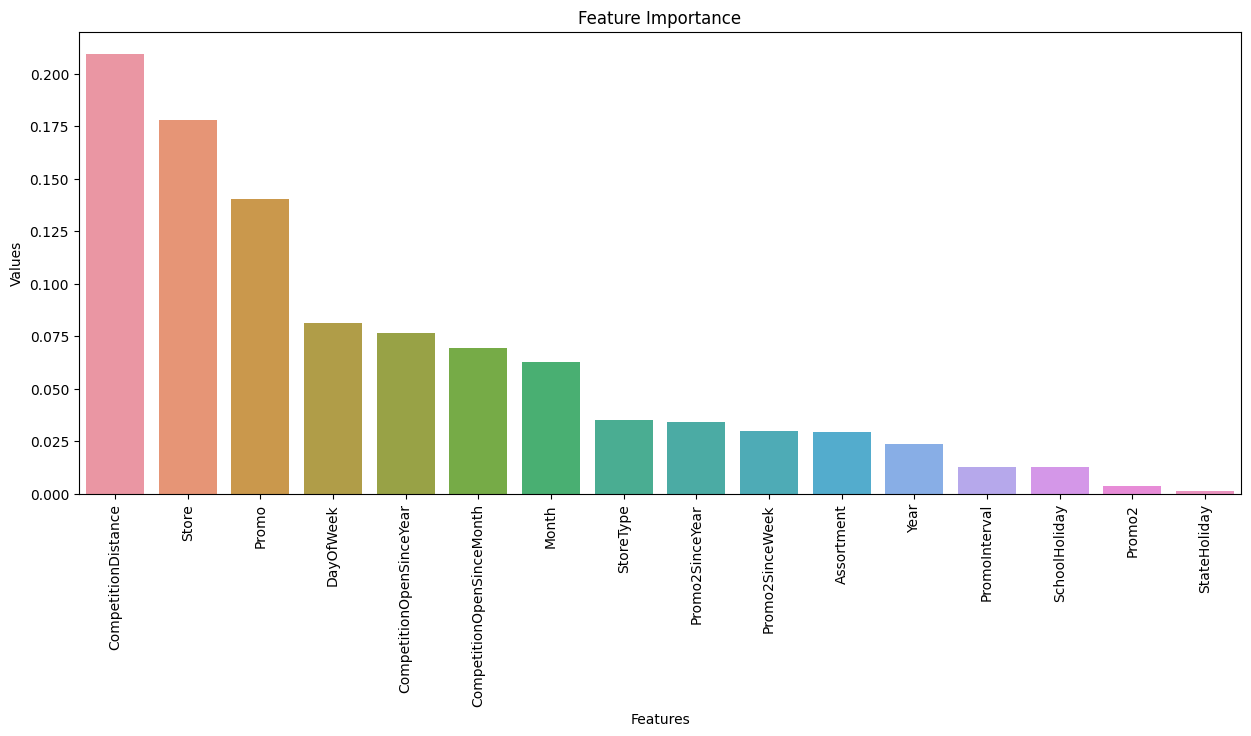

In [63]:
plt.figure(figsize=(15,6))

sns.barplot(x=feature_importance_df['Features'], y=feature_importance_df['Values'],
            data = feature_importance_df ).set(title='Feature Importance')

plt.xticks(rotation=90)
plt.show()

CompetitionDistance is the most important feature influencing sales. Since there is more competition present, it can be inferred that there is a huge population in that area and hence the sales are more 

## Conclusion
1. Feature engineering is very important to find a better model
2. closer the competition distance brings in more competition and therefore promo codes help here
3. As stores are mostly closed during holidays, they do not show influence on sales
4. Store type also influences sales

In [64]:
import pickle

In [65]:
pickle.dump(regression_model, open('regmodel.pkl','wb'))